<a href="https://colab.research.google.com/github/thayerm/tidyverse/blob/main/Data_Science_Project_Group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
if(!require("pacman")) install.packages("pacman")
pacman::p_load(pacman, knitr, unbalanced, ggplot2, readxl, magrittr, productplots, psych, RColorBrewer, tidyverse, tidymodels, ggridges, boot, InformationValue,caret, gridExtra, corrplot)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fastmatch’, ‘ParamHelpers’, ‘BBmisc’, ‘checkmate’, ‘parallelMap’, ‘XML’, ‘iterators’, ‘mlr’, ‘foreach’, ‘doParallel’, ‘FNN’, ‘RANN’



unbalanced installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’



productplots installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



psych installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘progressr’, ‘numDeriv

In [ ]:
df <- read_csv("https://raw.githubusercontent.com/thayerm/mkthayer/main/Bank_Churn.csv")
df

Rows: 10000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Geography, Gender
dbl (11): RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, NumOfPro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [ ]:
attach(df)
colnames(df)
df$Exited <- as.factor(df$Exited)
df$IsActiveMember <- as.factor(df$IsActiveMember)
df$HasCrCard <- as.factor(df$HasCrCard)
df$Tenure <- as.factor(Tenure)
df$Geography <- as.factor(df$Geography)
df$Gender <- as.factor(df$Gender)
df$NumOfProducts <- as.factor(df$NumOfProducts)
glimpse(df)

[1] "RowNumber"       "CustomerId"      "CreditScore"     "Geography"      
 [5] "Gender"          "Age"             "Tenure"          "Balance"        
 [9] "NumOfProducts"   "HasCrCard"       "IsActiveMember"  "EstimatedSalary"
[13] "Exited"

Rows: 10,000
Columns: 13
$ RowNumber       <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ CustomerId      <dbl> 15634602, 15647311, 15619304, 15701354, 15737888, 1557…
$ CreditScore     <dbl> 619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528,…
$ Geography       <fct> France, Spain, France, France, Spain, Spain, France, G…
$ Gender          <fct> Female, Female, Female, Female, Female, Male, Male, Fe…
$ Age             <dbl> 42, 41, 42, 39, 43, 44, 50, 29, 44, 27, 31, 24, 34, 25…
$ Tenure          <fct> 2, 1, 8, 1, 2, 8, 7, 4, 4, 2, 6, 3, 10, 5, 7, 3, 1, 9,…
$ Balance         <dbl> 0.00, 83807.86, 159660.80, 0.00, 125510.82, 113755.78,…
$ NumOfProducts   <fct> 1, 1, 3, 2, 1, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, …
$ HasCrCard       <fct> 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, …
$ IsActiveMember  <fct> 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, …
$ EstimatedSalary <dbl> 101348.88, 112542.58, 113931.57, 93826.63, 79084.10, 1…
$ Exited       

In [ ]:
## Set Seed: To reproduce the sampling for train - test split
set.seed(1)
head(df)
dim(df)
## Create an index to randomly sample 70% records for data set df to create train/test set
split<- sample(c(rep(0, 0.7 * nrow(df)), rep(1, 0.3 * nrow(df))))
table(split)

RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


[1] 10000    13

split
   0    1 
7000 3000 

In [ ]:
# Split into train and test
train <- df[split == 0, ]  
test <- df[split == 1, ]
summary(train)
dim(test)

   RowNumber      CustomerId        CreditScore      Geography       Gender    
 Min.   :   1   Min.   :15565701   Min.   :350.0   France :3533   Female:3178  
 1st Qu.:2501   1st Qu.:15629238   1st Qu.:583.0   Germany:1757   Male  :3822  
 Median :5006   Median :15690770   Median :651.0   Spain  :1710                
 Mean   :5003   Mean   :15691211   Mean   :649.9                               
 3rd Qu.:7490   3rd Qu.:15753269   3rd Qu.:716.0                               
 Max.   :9999   Max.   :15815690   Max.   :850.0                               
                                                                               
      Age           Tenure        Balance       NumOfProducts HasCrCard
 Min.   :18.0   7      : 759   Min.   :     0   1:3582        0:2061   
 1st Qu.:32.0   2      : 721   1st Qu.:     0   2:3192        1:4939   
 Median :37.0   8      : 709   Median : 97543   3: 183                 
 Mean   :38.9   6      : 702   Mean   : 76978   4:  43                 


[1] 3000   13

# Exploratory Data Analysis

In [ ]:
summary(train)

   RowNumber      CustomerId        CreditScore      Geography       Gender    
 Min.   :   1   Min.   :15565701   Min.   :350.0   France :3533   Female:3178  
 1st Qu.:2501   1st Qu.:15629238   1st Qu.:583.0   Germany:1757   Male  :3822  
 Median :5006   Median :15690770   Median :651.0   Spain  :1710                
 Mean   :5003   Mean   :15691211   Mean   :649.9                               
 3rd Qu.:7490   3rd Qu.:15753269   3rd Qu.:716.0                               
 Max.   :9999   Max.   :15815690   Max.   :850.0                               
                                                                               
      Age           Tenure        Balance       NumOfProducts HasCrCard
 Min.   :18.0   7      : 759   Min.   :     0   1:3582        0:2061   
 1st Qu.:32.0   2      : 721   1st Qu.:     0   2:3192        1:4939   
 Median :37.0   8      : 709   Median : 97543   3: 183                 
 Mean   :38.9   6      : 702   Mean   : 76978   4:  43                 


In [ ]:
detach(df)
attach(train)

Exited
   0    1 
5570 1430 

[1] 0.2567325

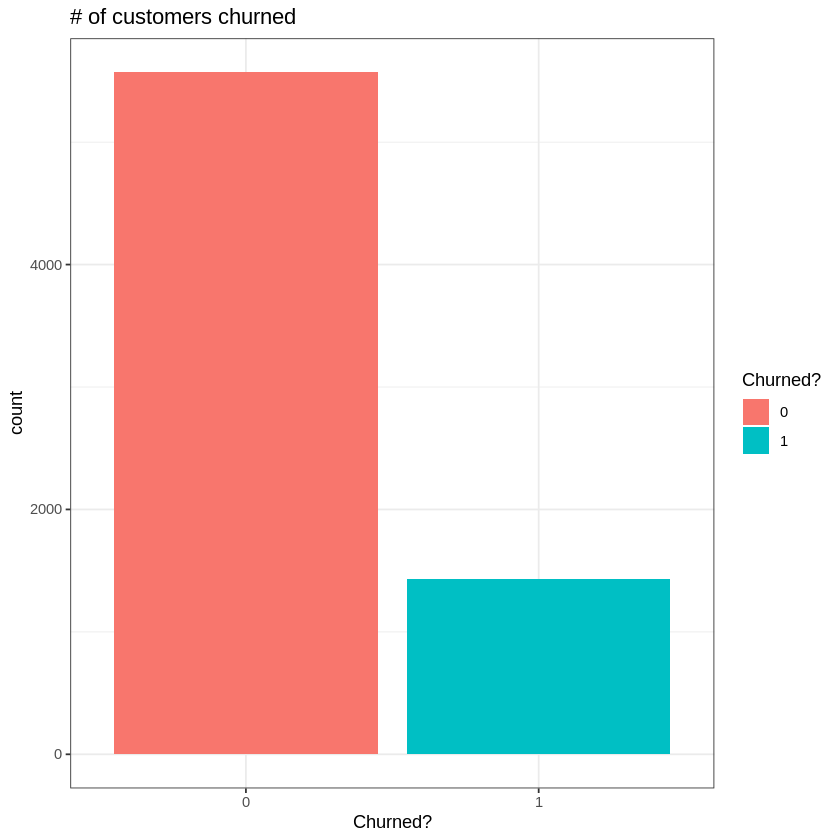

In [ ]:
train %>% ggplot(aes(x=Exited,fill=Exited)) +
geom_bar() + 
labs(
  title = "# of customers churned",
  fill = "Churned?",
  x = "Churned?"
) +
theme_bw()
table(Exited)
1430/5570
# About 25.67% of customers have churned 

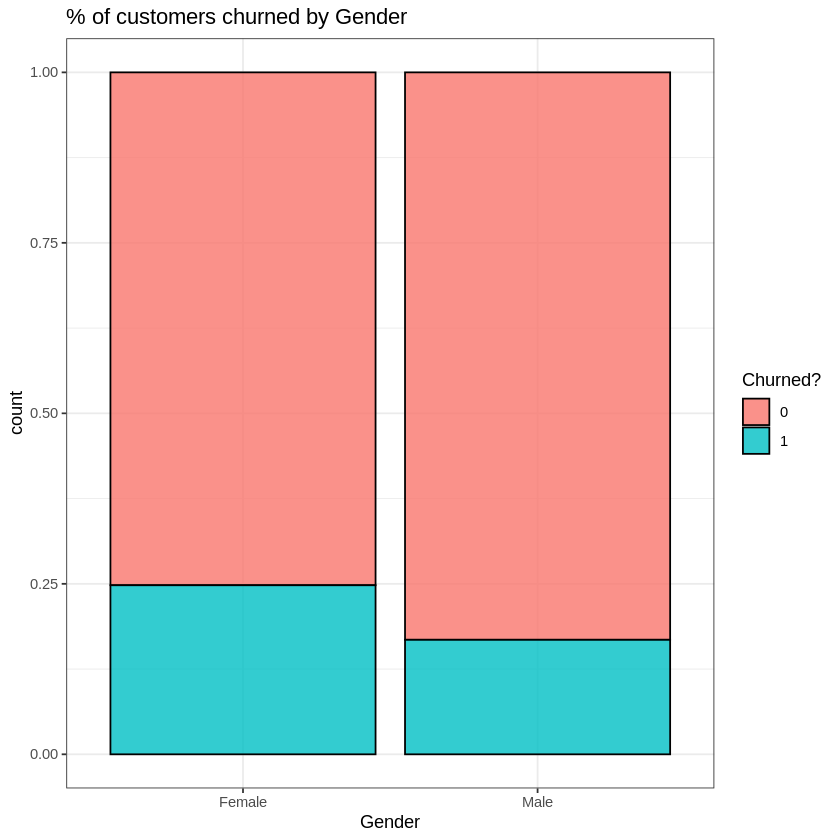

In [ ]:
train %>% ggplot(aes(Gender, fill = Exited)) +
geom_bar(color="black",alpha = 0.8, position="fill") +
theme_bw() + 
labs(
  title = "% of customers churned by Gender",
  fill = "Churned?"
)
# Women exit at a significantly higher rate than men

In [ ]:
chisq.test(table(Exited, Gender))
# Very low p-value suggests Gender is significant


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(Exited, Gender)
X-squared = 67.792, df = 1, p-value < 2.2e-16


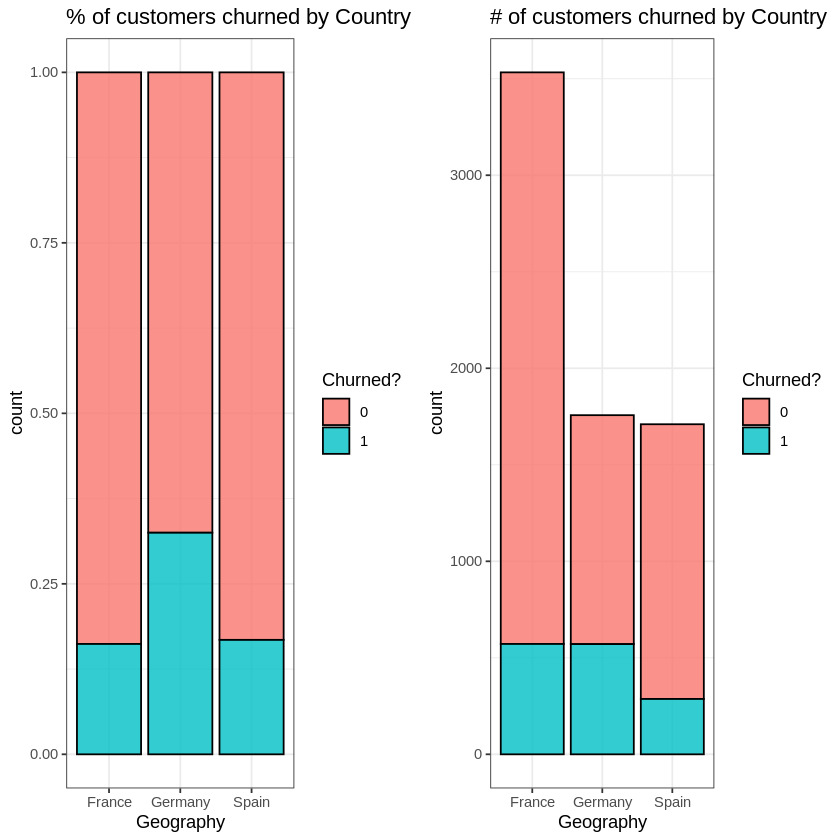

In [ ]:
ggp1 <- train %>% ggplot(aes(Geography, fill = Exited)) +
geom_bar(color = "black", alpha = 0.8, position="Fill") +
theme_bw() + 
labs(
  title = "% of customers churned by Country",
  fill = "Churned?"
)
ggp2 <- train %>% ggplot(aes(Geography, fill = Exited)) +
geom_bar(color = "black", alpha = 0.8) +
theme_bw() + 
labs(
  title = "# of customers churned by Country",
  fill = "Churned?"
)
# Germans exited at the highest rate of the three countries, French exited at the lowest rate
# Most customers are French
grid.arrange(ggp1, ggp2, ncol = 2)  


	Pearson's Chi-squared test

data:  table(Exited, Geography)
X-squared = 210.49, df = 2, p-value < 2.2e-16


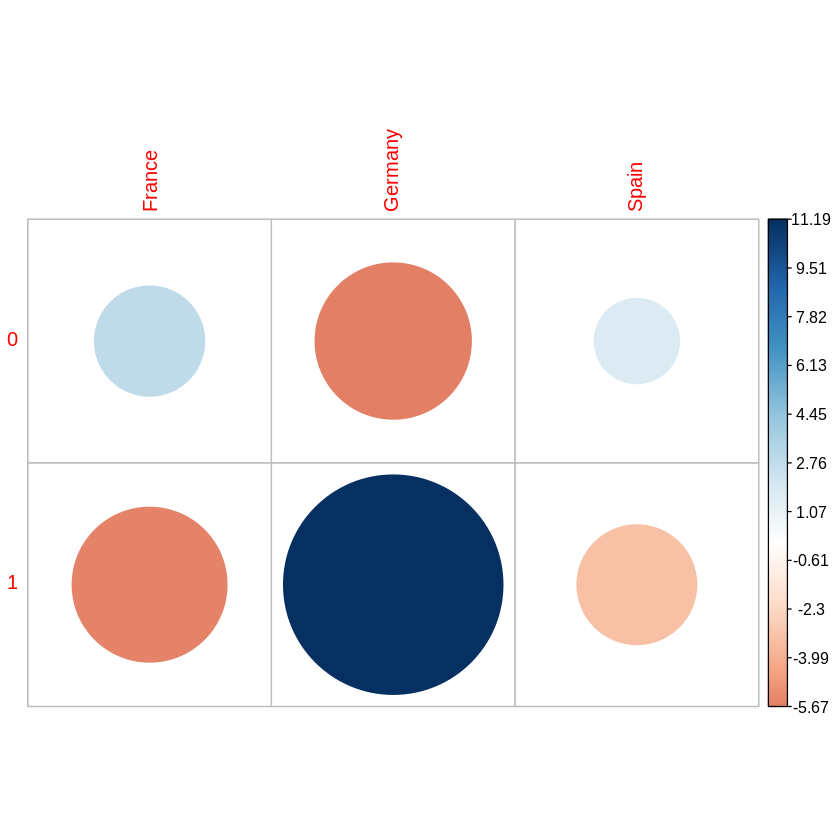

In [ ]:
chisq<- chisq.test(table(Exited,Geography))
chisq
# Very low p-value suggests Geography is significant
corrplot(chisq$residuals, is.cor = FALSE)
# Strong association with churn rate with Germany which means Geography is a signficant predictor


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(Exited, HasCrCard)
X-squared = 0.65754, df = 1, p-value = 0.4174


HasCrCard
   0    1 
2061 4939 

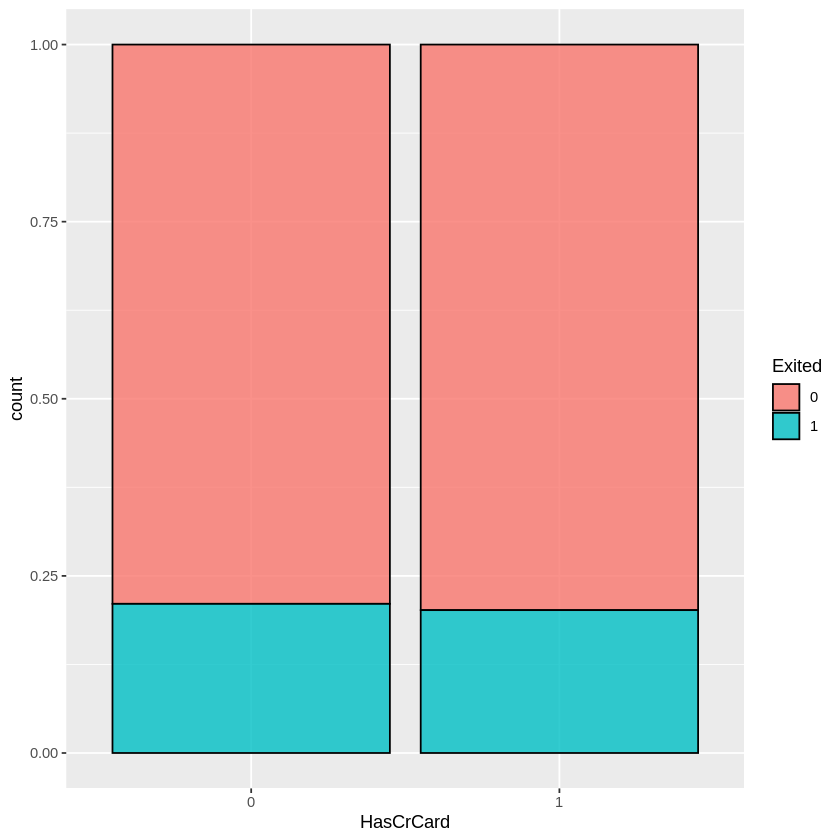

In [ ]:
train %>% ggplot(aes(HasCrCard, fill = Exited)) +
geom_bar(color = "black", alpha = 0.8, position="Fill")
chisq.test(table(Exited,HasCrCard))
table(HasCrCard)
# High p-value suggests having a credit card is not very significant, shown by near equal rates in graph as well


	Pearson's Chi-squared test

data:  table(Exited, NumOfProducts)
X-squared = 1027.1, df = 3, p-value < 2.2e-16


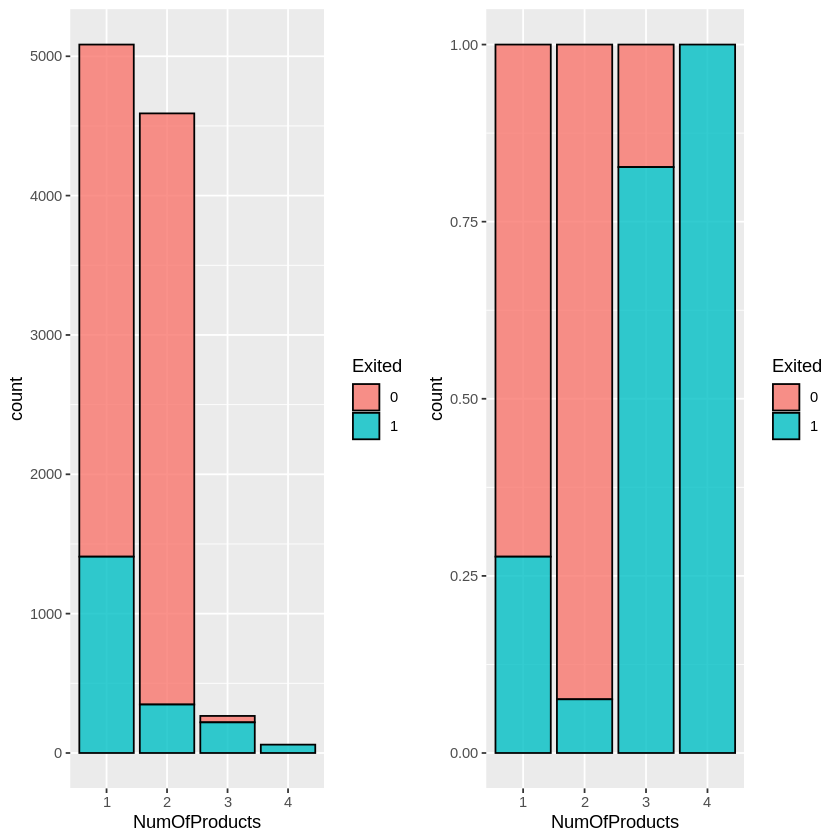

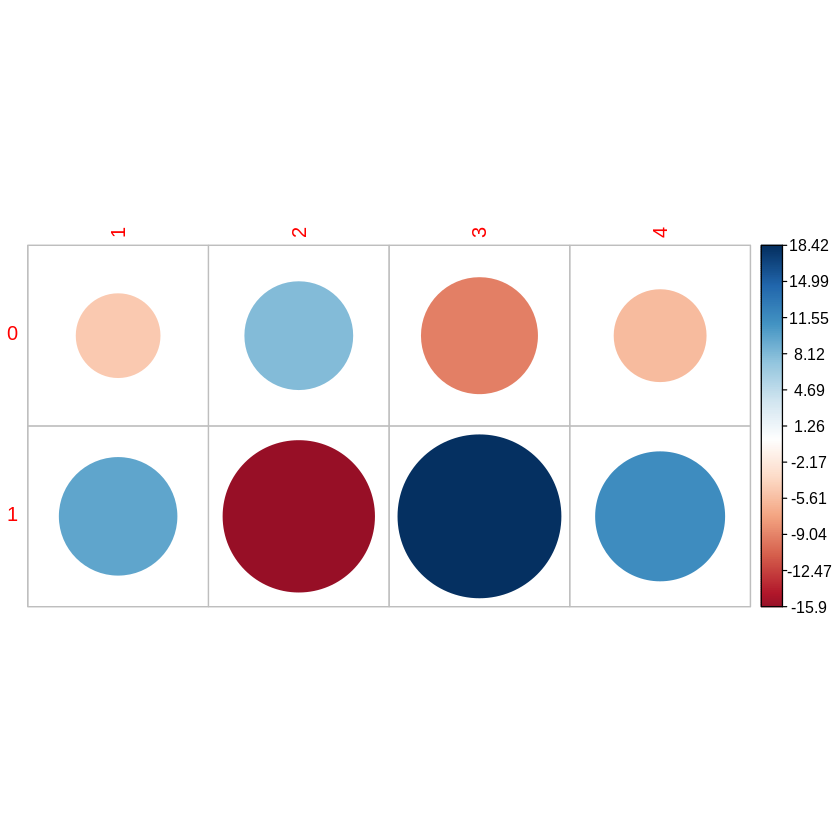

In [ ]:
ggp1 <- df %>% ggplot(aes(NumOfProducts, fill = Exited)) +
geom_bar(color = "black", alpha = 0.8)
ggp2 <- df %>% ggplot(aes(NumOfProducts, fill = Exited)) +
geom_bar(color = "black", alpha = 0.8, position = "Fill")
# Having a number of products of 3,4 lead to an extremely high exit rate, 1 product is also significantly higher of an exit rate than 2 products
grid.arrange(ggp1, ggp2, ncol = 2) 
chisq<- chisq.test(table(Exited,NumOfProducts))
chisq
# Very low p-value suggests significance
corrplot(chisq$residuals, is.cor = FALSE)
# Strong association with churn rate with 1,3,4 number of products


	Pearson's Chi-squared test

data:  table(Exited, Tenure)
X-squared = 10.665, df = 10, p-value = 0.3842


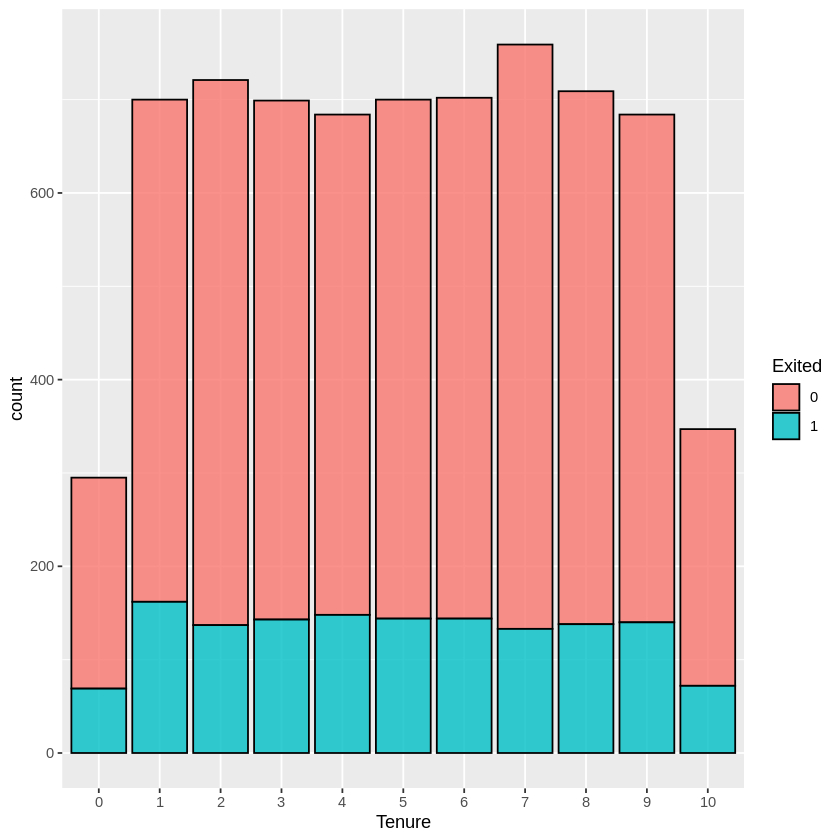

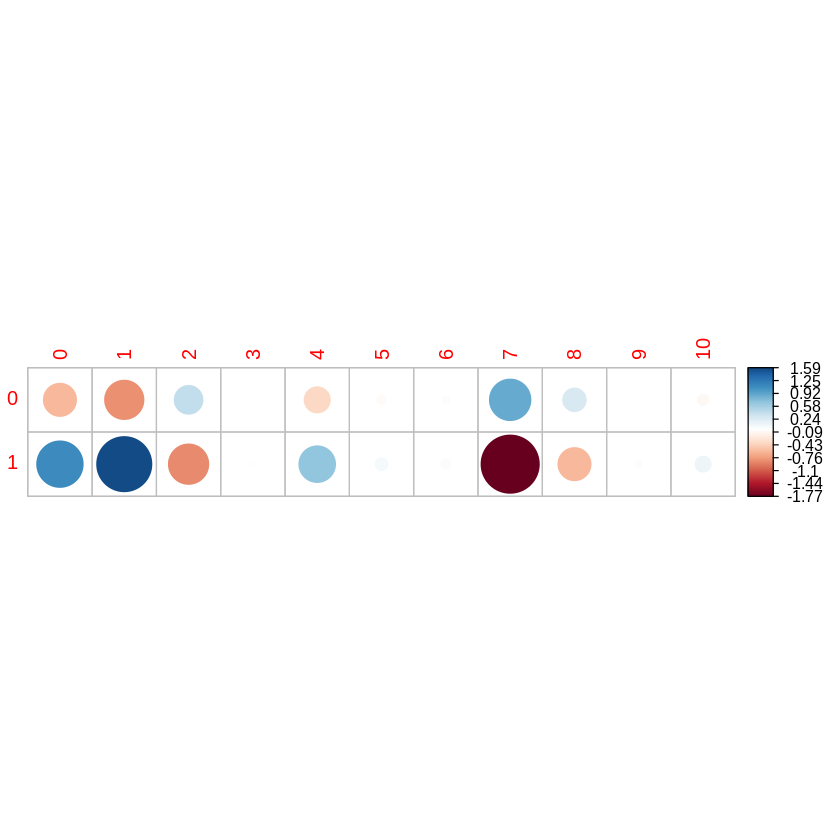

In [ ]:
train %>% ggplot(aes(Tenure, fill = Exited)) +
geom_bar(color = "black", alpha = 0.8)
# Most customers are between 1 and 9 years, the length of tenure doesn't appear to impact the exiting rate
chisq<-chisq.test(table(Exited,Tenure))
chisq
# Higher p-value suggests little significance
corrplot(chisq$residuals, is.cor = FALSE)
# There is no strong association

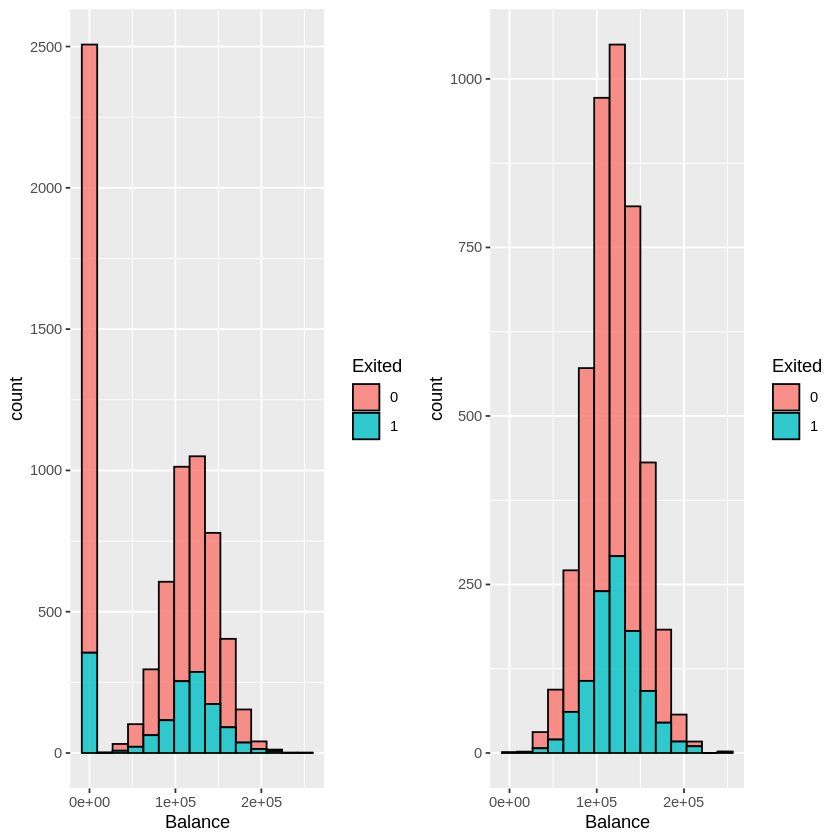

In [ ]:
ggp1 <- train %>% ggplot(aes(Balance, fill = Exited)) +
geom_histogram(color = "black", alpha = 0.8,bins = 15)
ggp2 <- train %>% filter(Balance > 0) %>%
ggplot(aes(Balance, fill = Exited)) +
geom_histogram(color = "black", alpha = 0.8, bins = 15)
# Lots of bank accounts with an empty balance, besides that the balances and the rate they leave follows a normal distribution
grid.arrange(ggp1, ggp2, ncol = 2) 

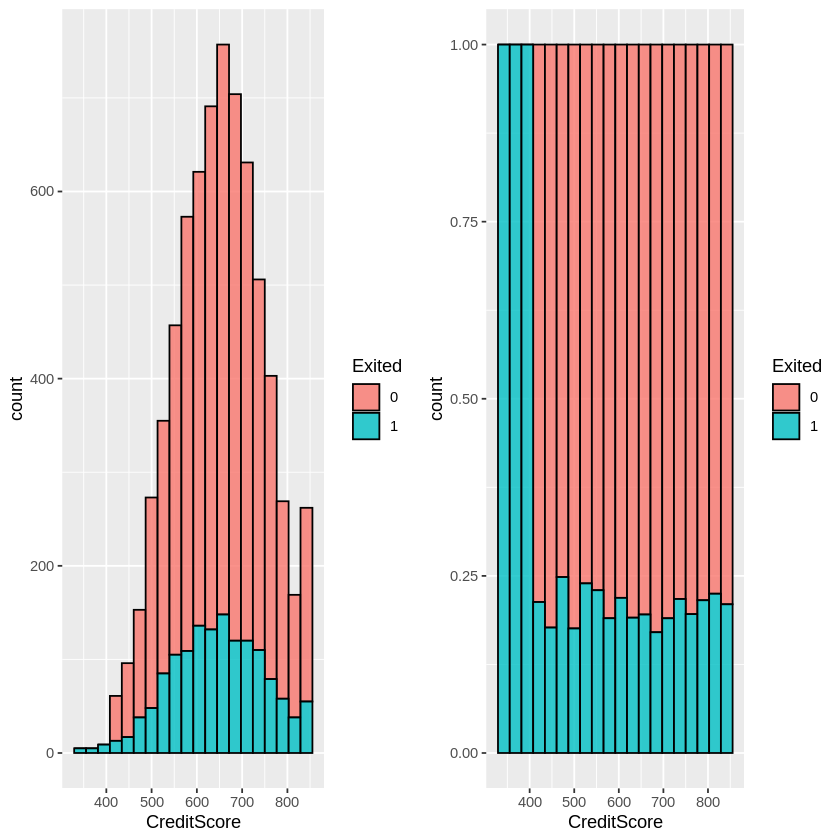

In [ ]:
ggp1 <- train %>% ggplot(aes(CreditScore, fill = Exited)) +
geom_histogram(color = "black", alpha = 0.8, bins = 20) 
ggp2 <- train %>% ggplot(aes(CreditScore, fill = Exited)) +
geom_histogram(color = "black", alpha = 0.8, position="Fill", bins = 20)
# Credit Scores under 400 always leave the bank, besides that there is a relatively normal distribution with a spike on the right side with super high credit scores
grid.arrange(ggp1, ggp2, ncol = 2) 

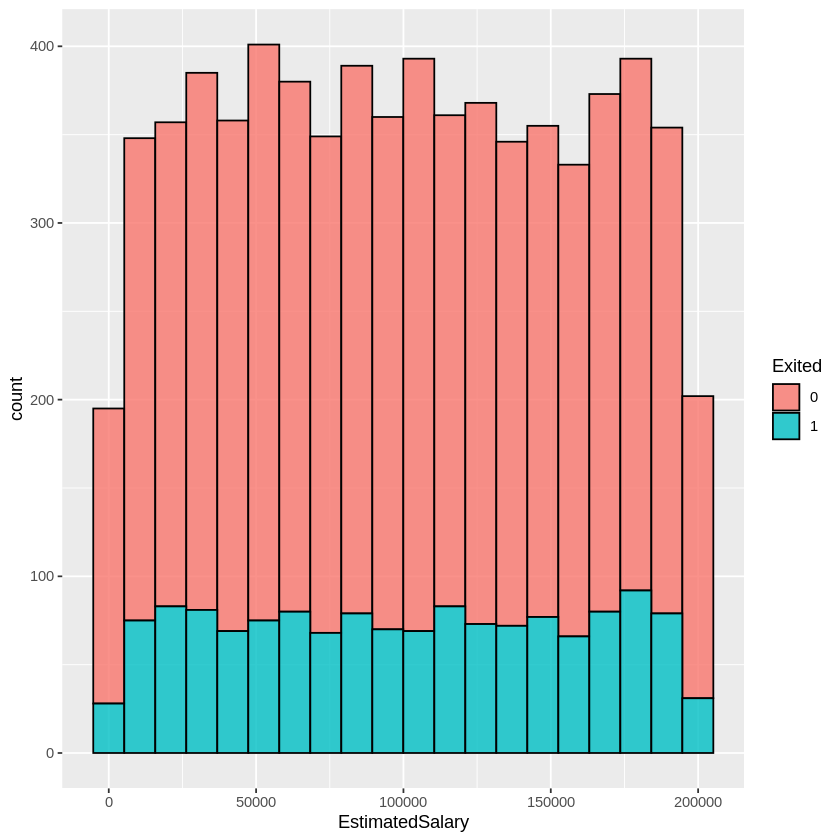

In [ ]:
train %>% ggplot(aes(EstimatedSalary, fill = Exited)) +
geom_histogram(color = "black", alpha = 0.8, bins = 20)
# Estimated Salary doesn't appear to be a strong predictor whether the client leaves or stays


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(Exited, IsActiveMember)
X-squared = 145.01, df = 1, p-value < 2.2e-16


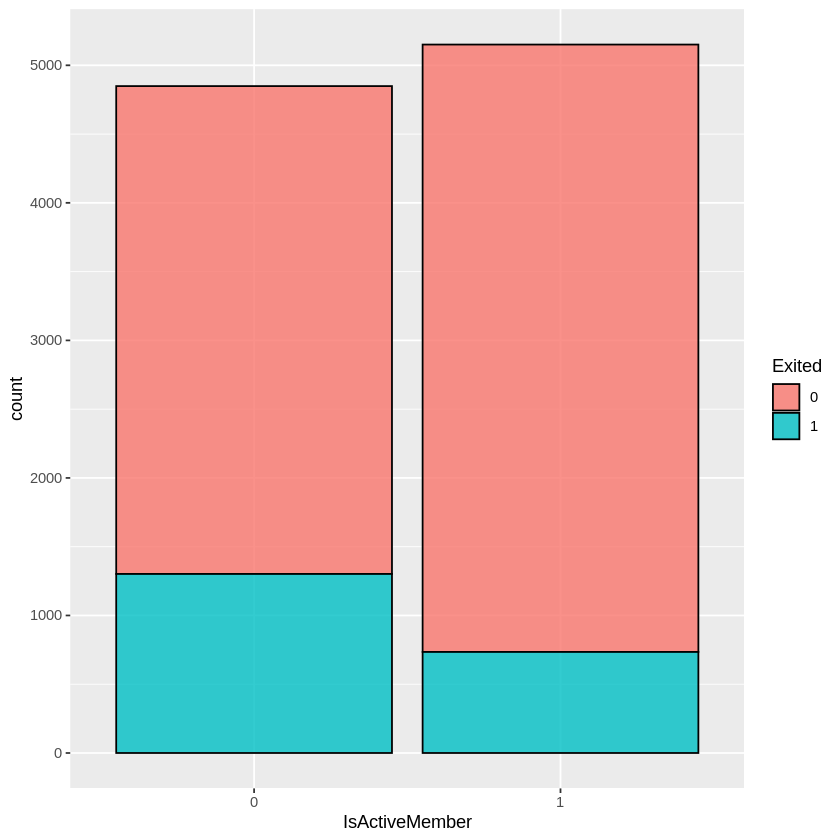

In [ ]:
df %>% ggplot(aes(IsActiveMember, fill = Exited)) +
geom_bar(color = "black", alpha = 0.8)
# Non-active members are more likely to exit
chisq.test(table(Exited,IsActiveMember))
# Very low p-value suggests significance

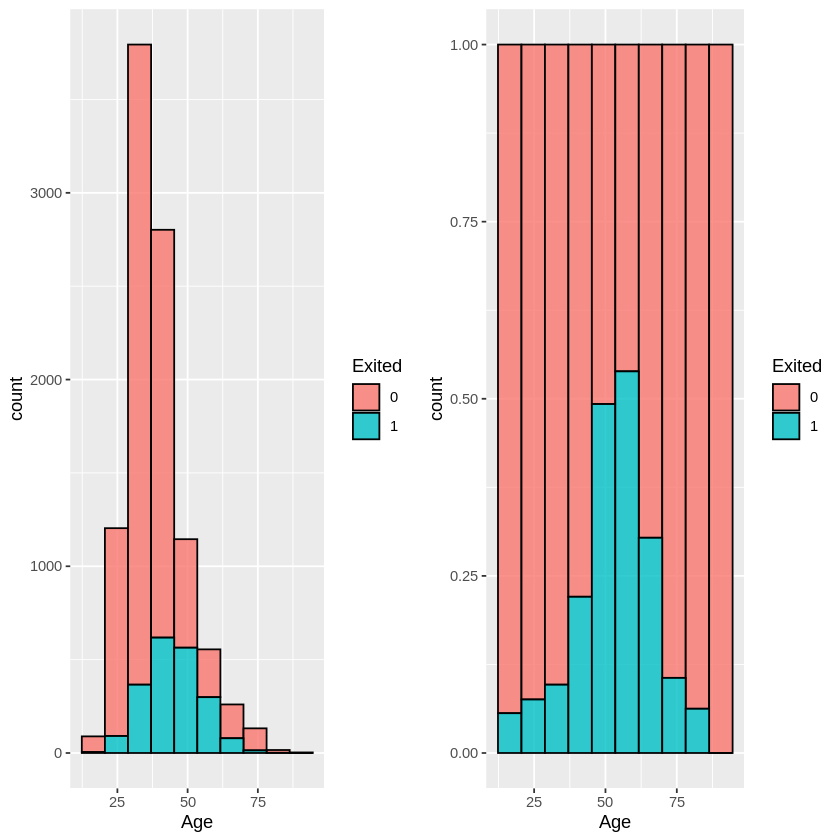

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   18.0    32.0    37.0    38.9    44.0    92.0 

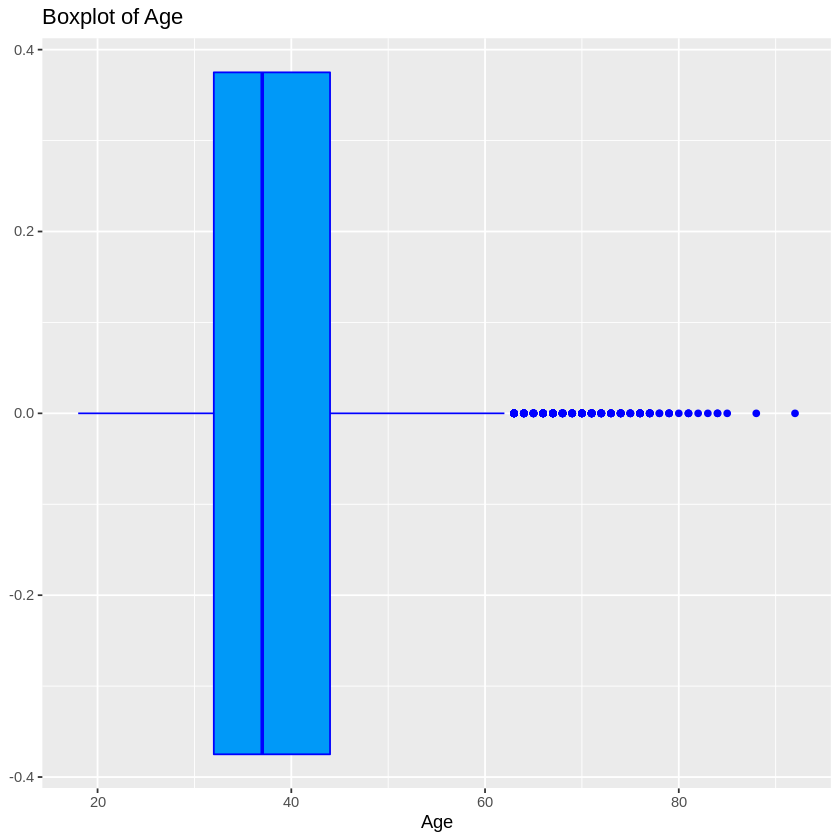

In [ ]:
ggp1 <- df %>% ggplot(aes(Age, fill = Exited)) +
geom_histogram(color = "black", alpha = 0.8,bins=10)
ggp2 <- df %>% ggplot(aes(Age, fill = Exited)) +
geom_histogram(color = "black", alpha = 0.8, position = "Fill",bins=10)
# Significant spike in the churn rate at middle age (35-60)
grid.arrange(ggp1, ggp2, ncol = 2) 
train %>% ggplot(aes(Age)) +
geom_boxplot(color="blue",fill="#0099f8") +
labs (
  title = "Boxplot of Age"
) 
summary(Age)
# Past 62 years old there is a significant number of outliers for age

# Balancing the Data Set

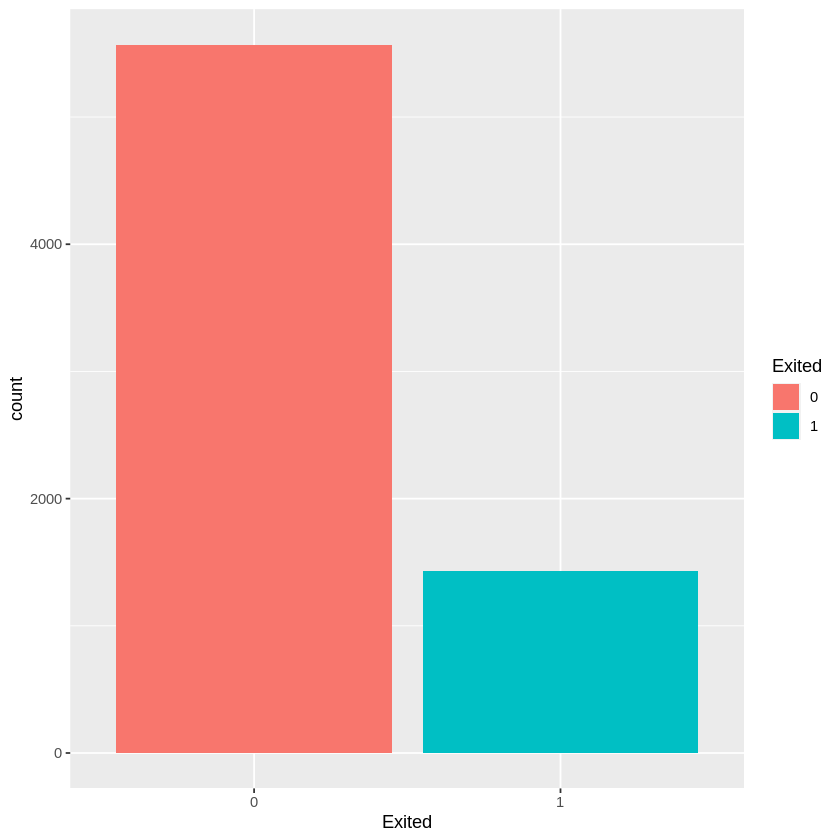

In [ ]:
ggplot(data = train, aes(fill = Exited)) +
    geom_bar(aes(x = Exited))

In [ ]:
predictors <- train[, -13]
response <- train$Exited
levels(response) <- c('0', '1') 

In [ ]:
undersampled <- ubBalance(predictors, response, type='ubUnder', verbose = TRUE)

Proportion of positives after ubUnder : 50 % of 2860 observations 


In [ ]:
balanced <- cbind(undersampled$X, undersampled$Y)

In [ ]:
names(balanced)[names(balanced) == "undersampled$Y"] <- "Exited"
levels(balanced$Exited) <- c('No', 'Yes')

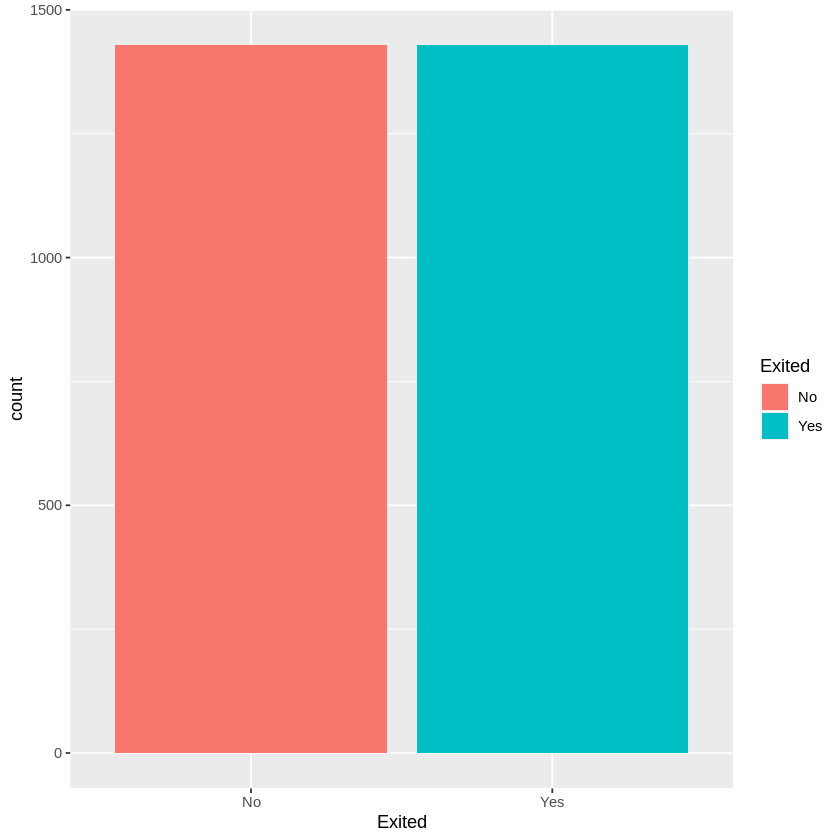

In [ ]:
ggplot(data = balanced, aes(fill = Exited)) +
    geom_bar(aes(x = Exited))

In [ ]:
detach(train)

In [ ]:
head(balanced)
attach(balanced)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,1,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,Yes
2,3,15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,Yes
3,6,15574012,645,Spain,Male,44,8,113755.8,2,1,0,149756.71,Yes
4,8,15656148,376,Germany,Female,29,4,115046.7,4,1,0,119346.88,Yes
5,20,15568982,726,France,Female,24,6,0.0,2,1,1,54724.03,No
6,23,15699309,510,Spain,Female,38,4,0.0,1,1,0,118913.53,Yes


# Logistic Regression pre-transformation/tuning


##Logistic Regression

In [ ]:
 fitforvar <- glm(formula = Exited ~ Gender + Geography + EstimatedSalary + Tenure + HasCrCard + IsActiveMember + Age + Balance + CreditScore + NumOfProducts, data = balanced, family = "binomial")
 caret::varImp(fitforvar)



,Overall
,<dbl>
GenderMale,5.287783e+00
GeographyGermany,8.037197e+00
GeographySpain,4.411261e-02
EstimatedSalary,8.867575e-04
Tenure1,1.569715e+00
Tenure2,1.479994e+00
Tenure3,2.129242e+00
Tenure4,6.725518e-01
Tenure5,1.832248e+00


In [ ]:
gender_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Gender, data = balanced, family = "binomial")
geography_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Geography, data = balanced, family = "binomial")
tenure_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Tenure, data = balanced, family = "binomial")
credit_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ HasCrCard, data = balanced, family = "binomial")
active_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ IsActiveMember, data = balanced, family = "binomial")

  age_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Age, data = balanced, family = "binomial")

  balance_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Balance, data = balanced, family = "binomial")

    numofprod_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ NumOfProducts, data = balanced, family = "binomial")

  creditscore_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ CreditScore, data = balanced, family = "binomial")

  combined_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Gender + Geography + IsActiveMember + Age + NumOfProducts, data = balanced, family = "binomial")

###Fit Summaries

In [ ]:
gender_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ Gender, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)   GenderMale  
     0.2238      -0.4438  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3930 	AIC: 3934

In [ ]:
geography_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ Geography, family = stats::binomial, 
    data = data)

Coefficients:
     (Intercept)  GeographyGermany    GeographySpain  
        -0.26021           0.92062          -0.05412  

Degrees of Freedom: 2859 Total (i.e. Null);  2857 Residual
Null Deviance:	    3965 
Residual Deviance: 3837 	AIC: 3843

In [ ]:
tenure_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ Tenure, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)      Tenure1      Tenure2      Tenure3      Tenure4      Tenure5  
     0.3840      -0.2800      -0.4679      -0.3190      -0.2230      -0.3045  
    Tenure6      Tenure7      Tenure8      Tenure9     Tenure10  
    -0.3120      -0.6584      -0.4937      -0.4395      -0.5381  

Degrees of Freedom: 2859 Total (i.e. Null);  2849 Residual
Null Deviance:	    3965 
Residual Deviance: 3949 	AIC: 3971

In [ ]:
credit_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ HasCrCard, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)   HasCrCard1  
 -4.586e-17    1.014e-16  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3965 	AIC: 3969

In [ ]:
active_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ IsActiveMember, family = stats::binomial, 
    data = data)

Coefficients:
    (Intercept)  IsActiveMember1  
         0.3575          -0.7648  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3863 	AIC: 3867

In [ ]:
age_fit


parsnip model object


Call:  stats::glm(formula = Exited ~ Age, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          Age  
   -3.13039      0.07626  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3583 	AIC: 3587

In [ ]:
balance_fit


parsnip model object


Call:  stats::glm(formula = Exited ~ Balance, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)      Balance  
 -4.089e-01    4.981e-06  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3898 	AIC: 3902

In [ ]:
creditscore_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ CreditScore, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)  CreditScore  
  0.3115817   -0.0004809  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3963 	AIC: 3967

In [ ]:
numofprod_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ NumOfProducts, family = stats::binomial, 
    data = data)

Coefficients:
   (Intercept)  NumOfProducts2  NumOfProducts3  NumOfProducts4  
        0.4326         -1.5840          2.3808         15.1335  

Degrees of Freedom: 2859 Total (i.e. Null);  2856 Residual
Null Deviance:	    3965 
Residual Deviance: 3389 	AIC: 3397

In [ ]:
combined_fit


parsnip model object


Call:  stats::glm(formula = Exited ~ Gender + Geography + IsActiveMember + 
    Age + NumOfProducts, family = stats::binomial, data = data)

Coefficients:
     (Intercept)        GenderMale  GeographyGermany    GeographySpain  
       -2.244689         -0.485243          0.928932         -0.002542  
 IsActiveMember1               Age    NumOfProducts2    NumOfProducts3  
       -0.893585          0.074073         -1.553328          2.462560  
  NumOfProducts4  
       15.926749  

Degrees of Freedom: 2859 Total (i.e. Null);  2851 Residual
Null Deviance:	    3965 
Residual Deviance: 2875 	AIC: 2893

# Data Transformations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_scaled
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes,3.737670
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes,3.737670
6,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,Yes,3.784190
8,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,Yes,3.367296
20,15568982,726,France,Female,24,6,0.00,2,1,1,54724.03,No,3.178054
23,15699309,510,Spain,Female,38,4,0.00,1,1,0,118913.53,Yes,3.637586
25,15625047,846,France,Female,38,5,0.00,1,1,1,187616.16,No,3.637586
29,15728693,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,No,3.761200
31,15589475,591,Spain,Female,39,3,0.00,3,1,0,140469.38,Yes,3.663562


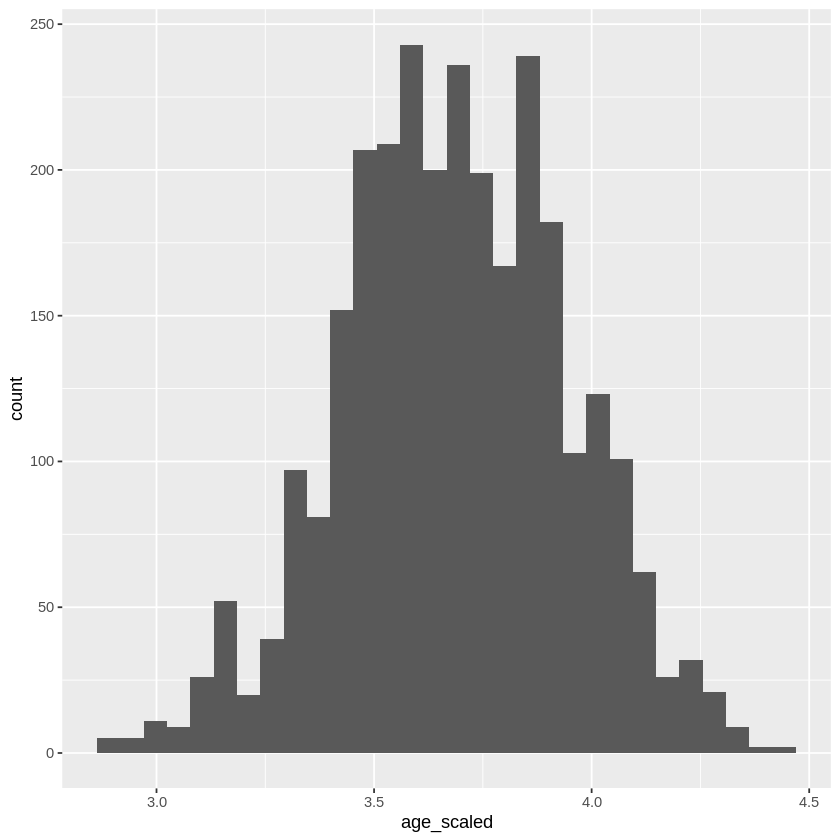

In [ ]:
balanced %<>%
 mutate(age_scaled = log(balanced$Age))
balanced %>%
 ggplot(aes(age_scaled)) +
 geom_histogram()
 balanced

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



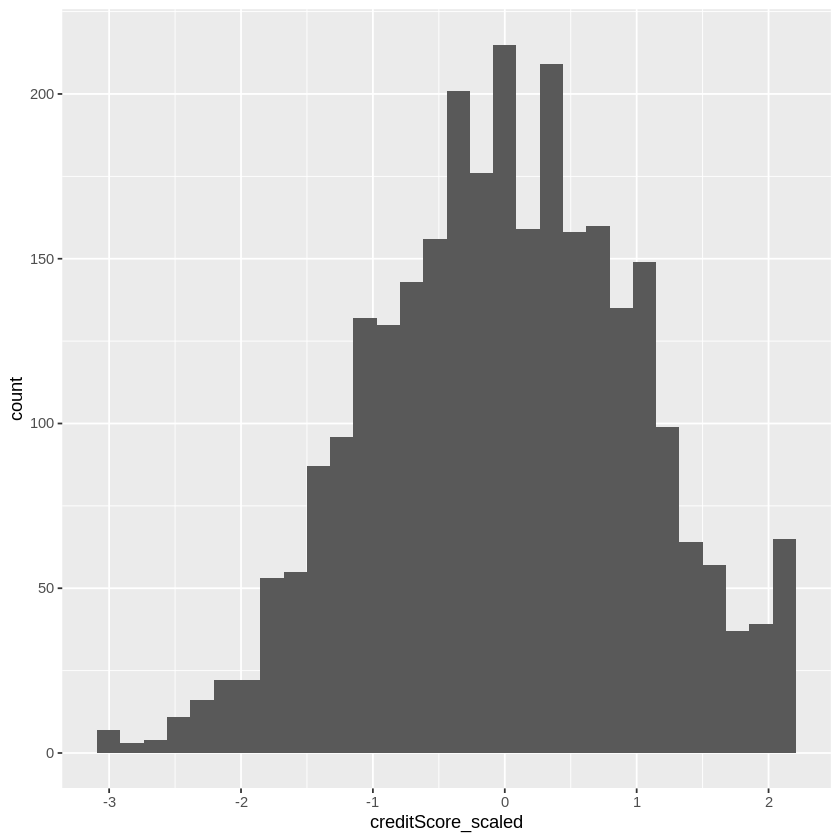

In [ ]:
balanced %<>%
 mutate(creditScore_scaled = scale(balanced$CreditScore)) 
balanced %>%
 ggplot(aes(creditScore_scaled)) +
 geom_histogram()

In [ ]:
head(balanced)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_scaled,creditScore_scaled
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,"<dbl[,1]>"
1,1,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,Yes,3.737670,-0.29605616
2,3,15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,Yes,3.737670,-1.49449212
3,6,15574012,645,Spain,Male,44,8,113755.8,2,1,0,149756.71,Yes,3.784190,-0.02973706
4,8,15656148,376,Germany,Female,29,4,115046.7,4,1,0,119346.88,Yes,3.367296,-2.78511546
5,20,15568982,726,France,Female,24,6,0.0,2,1,1,54724.03,No,3.178054,0.79994938
6,23,15699309,510,Spain,Female,38,4,0.0,1,1,0,118913.53,Yes,3.637586,-1.41254778


In [ ]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

In [ ]:
balanced_log <- balanced
balanced_log$CreditScore <- log(CreditScore)
balanced_log$Age <- log(Age)
balanced_log$Balance <- log(Balance)
balanced_log$EstimatedSalary <- log(EstimatedSalary)
balanced_log[is.nan(balanced_log) | balanced_log == "Inf" | balanced_log == '-Inf'] <- NA
balanced_log <- balanced_log[complete.cases(balanced_log),]

In [ ]:
balanced_log

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_scaled,creditScore_scaled
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,"<dbl[,1]>"
2,3,15619304,6.218600,France,Female,3.737670,8,11.98081,3,1,0,11.643353,Yes,3.737670,-1.49449212
3,6,15574012,6.469250,Spain,Male,3.784190,8,11.64181,2,1,0,11.916767,Yes,3.784190,-0.02973706
4,8,15656148,5.929589,Germany,Female,3.367296,4,11.65309,4,1,0,11.689789,Yes,3.367296,-2.78511546
8,29,15728693,6.352629,Germany,Female,3.761200,3,11.85899,1,1,1,11.514798,No,3.761200,-0.75699307
10,36,15794171,6.163315,France,Female,3.806662,0,11.80756,1,1,0,10.233618,Yes,3.806662,-1.77105427
11,42,15738148,6.142037,France,Female,3.931826,8,11.71605,1,0,0,12.107895,Yes,3.931826,-1.87348469
12,44,15755196,6.726233,France,Female,3.891820,2,11.78596,1,0,0,12.177497,Yes,3.891820,1.90619796
13,51,15616550,6.548219,Germany,Male,3.784190,10,11.66447,2,1,0,12.196321,No,3.784190,0.51314419
14,55,15569590,6.398595,Germany,Male,3.737670,1,11.49777,1,1,0,10.597004,Yes,3.737670,-0.48043092


#Regression

##Logistic Regression

In [ ]:
 fitforvar <- glm(formula = Exited ~ Gender + Geography + Tenure + NumOfProducts + EstimatedSalary + HasCrCard + IsActiveMember + age_scaled + Balance + creditScore_scaled, data = balanced, family = "binomial")
 caret::varImp(fitforvar)


,Overall
,<dbl>
GenderMale,5.35856014
GeographyGermany,7.93291730
GeographySpain,0.07553990
Tenure1,1.51181062
Tenure2,1.43053174
Tenure3,2.05527445
Tenure4,0.59644249
Tenure5,1.73617867
Tenure6,1.25821647


In [ ]:
gender_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Gender, data = balanced, family = "binomial")
geography_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Geography, data = balanced, family = "binomial")
tenure_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Tenure, data = balanced, family = "binomial")
credit_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ HasCrCard, data = balanced, family = "binomial")
active_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ IsActiveMember, data = balanced, family = "binomial")
   combined_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Gender + Geography + Tenure + HasCrCard + IsActiveMember, data = balanced, family = "binomial")
  
  age_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ age_scaled, data = balanced, family = "binomial")

 balance_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Balance, data = balanced, family = "binomial")
 

  creditscore_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ creditScore_scaled, data = balanced, family = "binomial")

   numofprod_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ NumOfProducts, data = balanced, family = "binomial")

  
  combined_fit <- logistic_reg() %>%
  set_engine("glm") %>%
  fit(Exited ~ Gender + Geography + IsActiveMember + age_scaled +NumOfProducts , data = balanced, family = "binomial")

  

###Fit Summaries

In [ ]:
gender_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ Gender, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)   GenderMale  
     0.2238      -0.4438  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3930 	AIC: 3934

In [ ]:
geography_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ Geography, family = stats::binomial, 
    data = data)

Coefficients:
     (Intercept)  GeographyGermany    GeographySpain  
        -0.26021           0.92062          -0.05412  

Degrees of Freedom: 2859 Total (i.e. Null);  2857 Residual
Null Deviance:	    3965 
Residual Deviance: 3837 	AIC: 3843

In [ ]:
tenure_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ Tenure, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)      Tenure1      Tenure2      Tenure3      Tenure4      Tenure5  
     0.3840      -0.2800      -0.4679      -0.3190      -0.2230      -0.3045  
    Tenure6      Tenure7      Tenure8      Tenure9     Tenure10  
    -0.3120      -0.6584      -0.4937      -0.4395      -0.5381  

Degrees of Freedom: 2859 Total (i.e. Null);  2849 Residual
Null Deviance:	    3965 
Residual Deviance: 3949 	AIC: 3971

In [ ]:
credit_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ HasCrCard, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)   HasCrCard1  
 -4.586e-17    1.014e-16  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3965 	AIC: 3969

In [ ]:
active_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ IsActiveMember, family = stats::binomial, 
    data = data)

Coefficients:
    (Intercept)  IsActiveMember1  
         0.3575          -0.7648  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3863 	AIC: 3867

In [ ]:
age_fit


parsnip model object


Call:  stats::glm(formula = Exited ~ age_scaled, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)   age_scaled  
    -12.039        3.264  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3553 	AIC: 3557

In [ ]:
balance_fit


parsnip model object


Call:  stats::glm(formula = Exited ~ Balance, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)      Balance  
 -4.089e-01    4.981e-06  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3898 	AIC: 3902

In [ ]:
creditscore_fit


parsnip model object


Call:  stats::glm(formula = Exited ~ creditScore_scaled, family = stats::binomial, 
    data = data)

Coefficients:
       (Intercept)  creditScore_scaled  
         8.914e-07          -4.695e-02  

Degrees of Freedom: 2859 Total (i.e. Null);  2858 Residual
Null Deviance:	    3965 
Residual Deviance: 3963 	AIC: 3967

In [ ]:
numofprod_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ NumOfProducts, family = stats::binomial, 
    data = data)

Coefficients:
   (Intercept)  NumOfProducts2  NumOfProducts3  NumOfProducts4  
        0.4326         -1.5840          2.3808         15.1335  

Degrees of Freedom: 2859 Total (i.e. Null);  2856 Residual
Null Deviance:	    3965 
Residual Deviance: 3389 	AIC: 3397

In [ ]:
combined_fit

parsnip model object


Call:  stats::glm(formula = Exited ~ Gender + Geography + IsActiveMember + 
    age_scaled + NumOfProducts, family = stats::binomial, data = data)

Coefficients:
     (Intercept)        GenderMale  GeographyGermany    GeographySpain  
      -10.972002         -0.494113          0.921913         -0.004936  
 IsActiveMember1        age_scaled    NumOfProducts2    NumOfProducts3  
       -0.876496          3.191504         -1.546152          2.505916  
  NumOfProducts4  
       15.884858  

Degrees of Freedom: 2859 Total (i.e. Null);  2851 Residual
Null Deviance:	    3965 
Residual Deviance: 2855 	AIC: 2873

# Applying the Model to Test

In [ ]:
# Model only using significant predictive variables from balanced data set
model <- glm(Exited ~  log(Age) + NumOfProducts + Geography + Gender + IsActiveMember, data = balanced, family = "binomial")
churn_probabilities <- model %>% predict(test, type="response")
predict_churn <- ifelse(churn_probabilities>0.5,1,0)
predict_churn <- as.factor(predict_churn)

confusionMatrix(data=predict_churn, reference = test$Exited)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1825  146
         1  568  461
                                          
               Accuracy : 0.762           
                 95% CI : (0.7463, 0.7771)
    No Information Rate : 0.7977          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4146          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7626          
            Specificity : 0.7595          
         Pos Pred Value : 0.9259          
         Neg Pred Value : 0.4480          
             Prevalence : 0.7977          
         Detection Rate : 0.6083          
   Detection Prevalence : 0.6570          
      Balanced Accuracy : 0.7611          
                                          
       'Positive' Class : 0               
                        

In [ ]:
# Model only using significant predictive variables from train data set
model2 <- glm(Exited ~  Age + NumOfProducts + Geography + Gender + IsActiveMember, data = train, family = "binomial")
churn_probabilities2 <- model2 %>% predict(test, type="response")
predict_churn2 <- ifelse(churn_probabilities2>0.5,1,0)
predict_churn2 <- as.factor(predict_churn2)

confusionMatrix(data=predict_churn2, reference = test$Exited)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2297  385
         1   96  222
                                         
               Accuracy : 0.8397         
                 95% CI : (0.826, 0.8526)
    No Information Rate : 0.7977         
    P-Value [Acc > NIR] : 2.289e-09      
                                         
                  Kappa : 0.396          
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9599         
            Specificity : 0.3657         
         Pos Pred Value : 0.8565         
         Neg Pred Value : 0.6981         
             Prevalence : 0.7977         
         Detection Rate : 0.7657         
   Detection Prevalence : 0.8940         
      Balanced Accuracy : 0.6628         
                                         
       'Positive' Class : 0              
                                         

In [ ]:
# Model using all predictive variables
model3 <- glm(Exited ~ Age + NumOfProducts + Geography + Gender + Balance + IsActiveMember + CreditScore + EstimatedSalary + Tenure + HasCrCard, data = balanced, family = "binomial")
churn_probabilities3 <- model3 %>% predict(test, type="response")
predict_churn3 <- ifelse(churn_probabilities3>0.5,1,0)
predict_churn3 <- as.factor(predict_churn3)

confusionMatrix(data=predict_churn3, reference = test$Exited)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1832  140
         1  561  467
                                          
               Accuracy : 0.7663          
                 95% CI : (0.7508, 0.7814)
    No Information Rate : 0.7977          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4249          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7656          
            Specificity : 0.7694          
         Pos Pred Value : 0.9290          
         Neg Pred Value : 0.4543          
             Prevalence : 0.7977          
         Detection Rate : 0.6107          
   Detection Prevalence : 0.6573          
      Balanced Accuracy : 0.7675          
                                          
       'Positive' Class : 0               
                        

# Evaluation

**Assumptions**
We assumed that NumOfProds and Tenure were also factors as they were discrete variables. 

**Determinig which variables to use**

* During exploratory data analysis, we used the chi-square test to determine that the Gender, Geography, IsActiveMember, Age, and NumOfProducts variables were the most significant variables for prediction. This was further confirmed when we used the varImp function from the caret package to have an additional way to asses each variables' predicting power.

**Data transformations**
* We transformed Age and CreditScore due to their skewed nature in exploratory data analysis. We used a log transform for Age because it was skewed right so the transformation made it a normal distribution. We used a z-transform for CreditScore because it further normalized the distribution.

**Data transformations affects on the logistic model**
* The scaling of Age improved the predictability of the model. We can see this in the AIC for combined_fit using the Age and age_scaled variables. The age_scaled variables significantly lowered the AIC by 20.

**Model 1**
* This model used the balanced data set and only the predictive variables that were significant
* Although the accuracy was worse than model 2, the specificity was far better, making it a more useful model for determining likelihood of a customer churning
* This model outperformed model 3 in accuracy, sensitivity, and specificity
* The combined fit had the lowest AIC which was to be expected and was the strongest of the models we used

**Model 2**
* This model used the train data set and only the predictive variables that were significant
* It had the highest accuracy and sensitivity of the three models, but its specificity was very poor, making it less useful as an actual model
* The low specificity makes sense given the train data set is overwhelmed with non-churning clients, making it harder for the model to accurately determine those who would churn

**Model 3**
* This model used the balanced data set and all predictive variables
* It underperformed both model 1 and 2 in accuracy and sensitivity, but outperformed model 2 in specificity, highlighting the benefit of the balanced data set
* Although it performed well in accuracy, sensitivity, and specificity it still fell behind model 1 in all 3 of those categories, making model 1 the clear choice as the best model to use in production


